# Wine Quality Prediction

## Imports and initial configurations

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

## Loading and inspecting data

In [17]:
wine = pd.read_csv("winequality-red.csv")
print("Successfully imported data!")

Successfully imported data!


In [19]:
print(wine.shape)

(1599, 12)


In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
# Check for missing values
print(wine.isna().sum()) 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Basic exploratory analysis

In [21]:
display(wine.corr(numeric_only=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [22]:
wine.groupby('quality').mean() #Groupby quality and get mean of each column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Create binary variable 'goodquality'

In [23]:
# Criar coluna binária: 1 se quality >= 7, caso contrário 0
wine['goodquality'] = (wine['quality'] >= 7).astype(int)
print(wine['goodquality'].value_counts())

goodquality
0    1382
1     217
Name: count, dtype: int64


## Distribution of Wine Quality

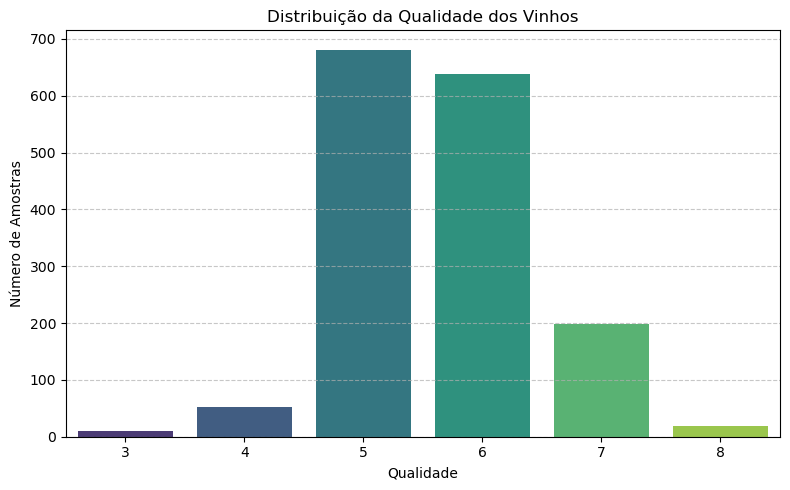

In [24]:
#distribuicao da qualidade dos vinhos
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine, palette='viridis')

plt.title('Distribuição da Qualidade dos Vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Número de Amostras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Histograms + boxplots by variable

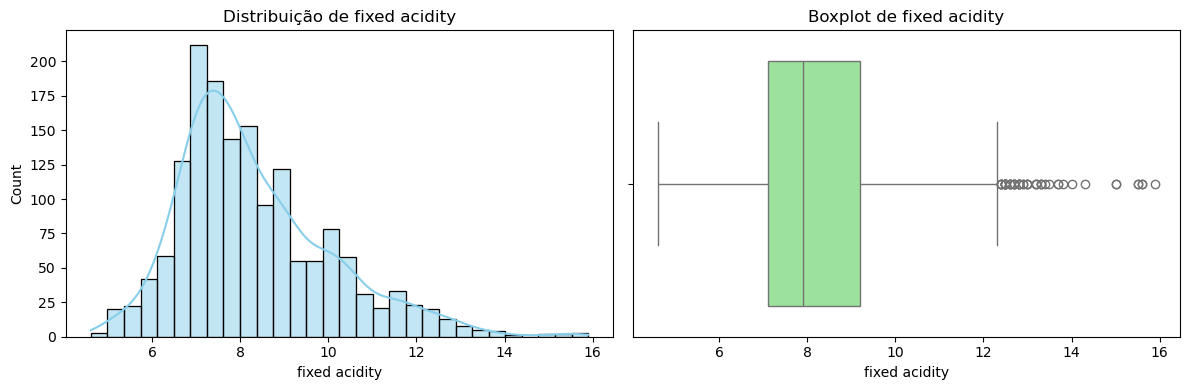

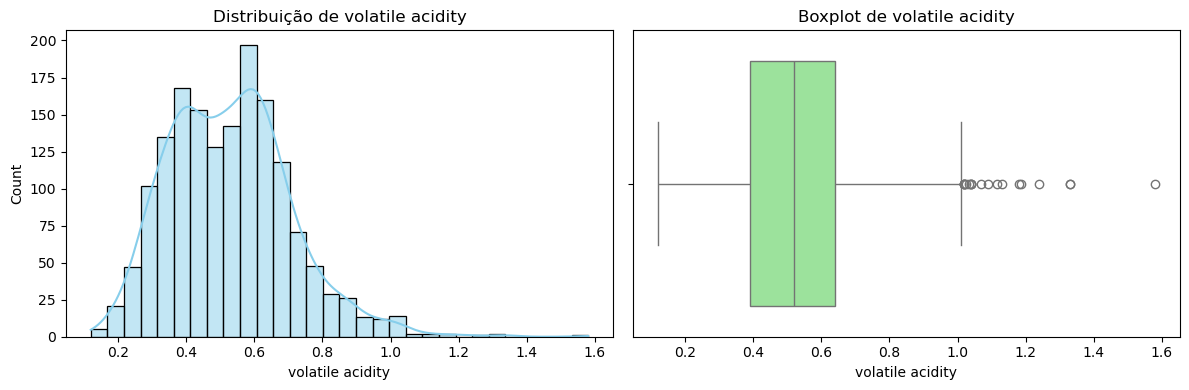

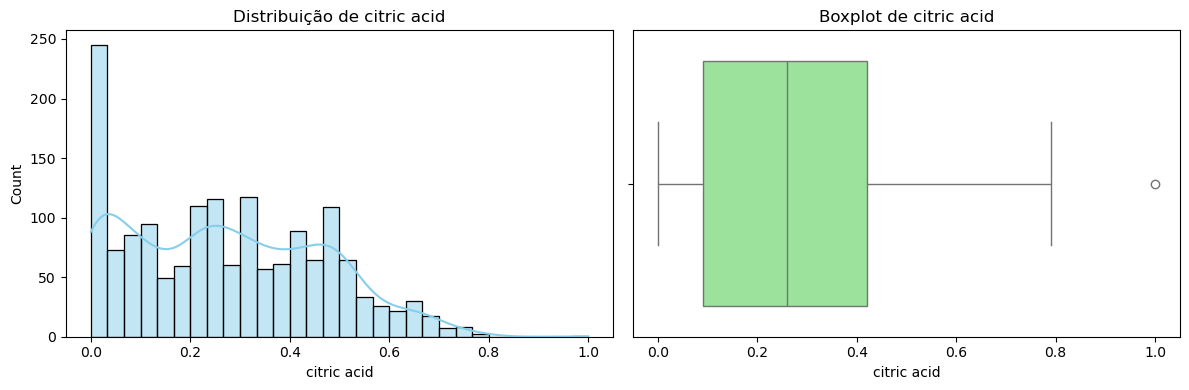

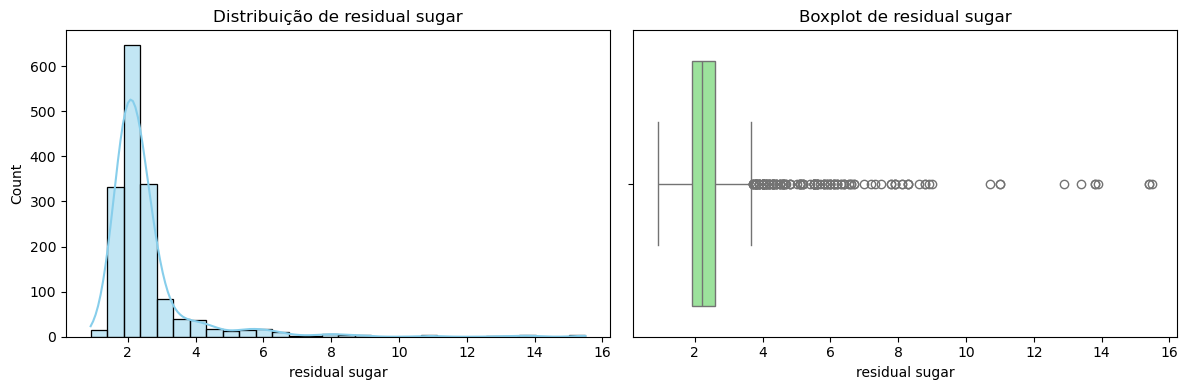

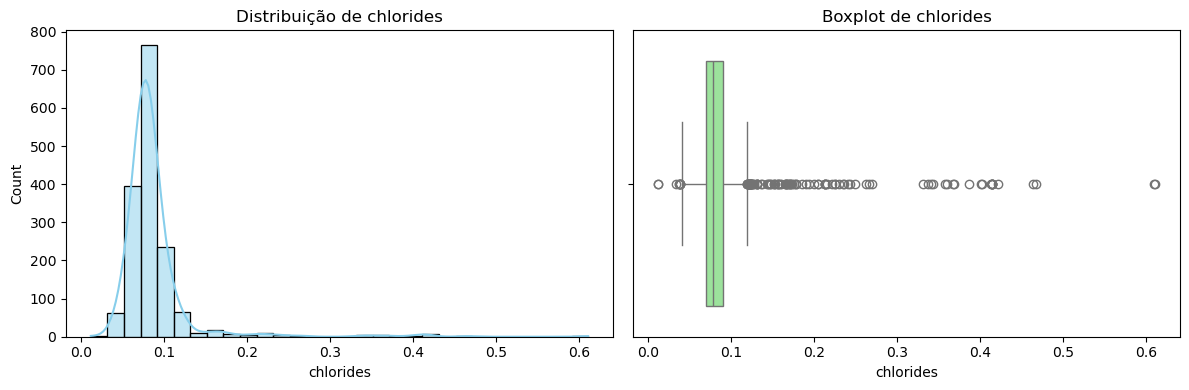

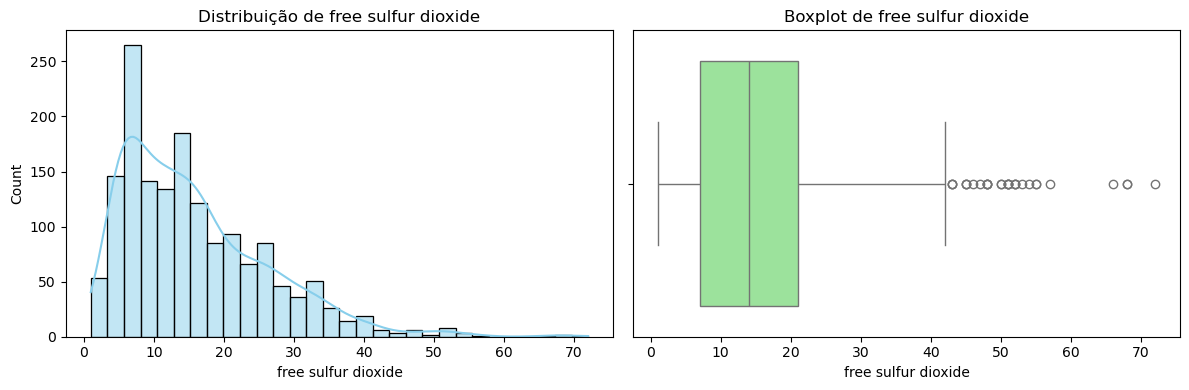

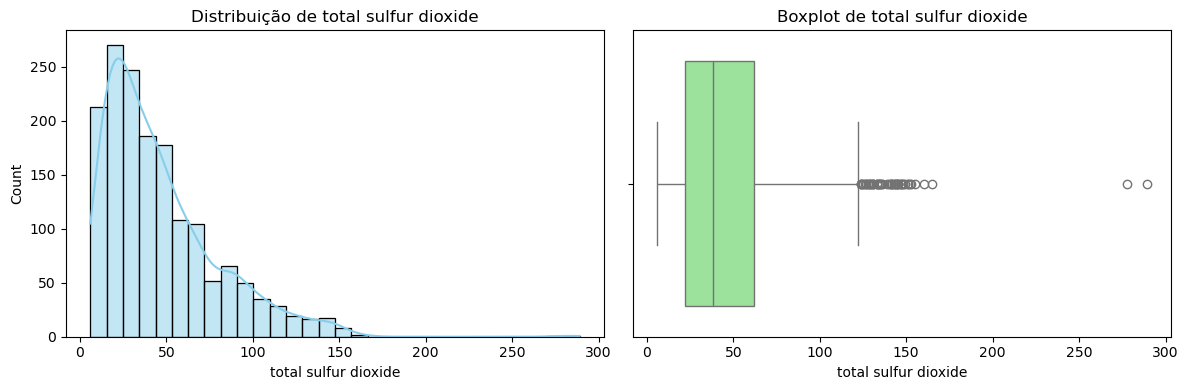

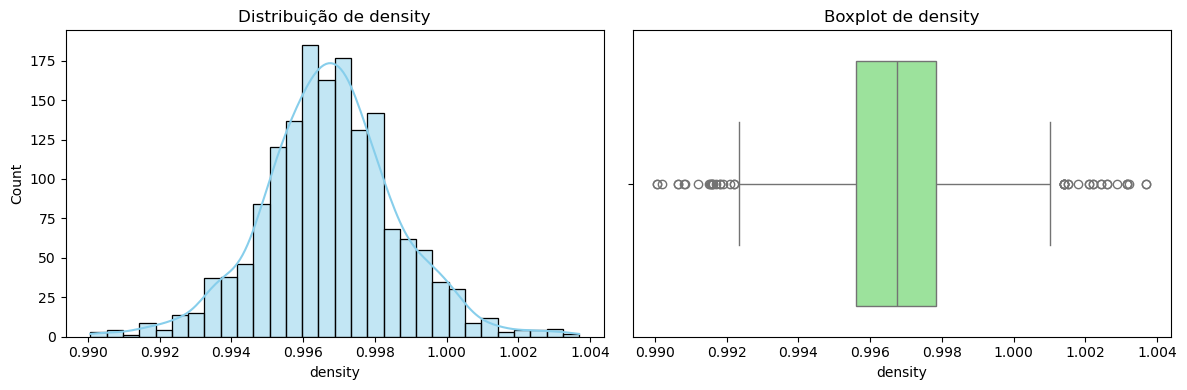

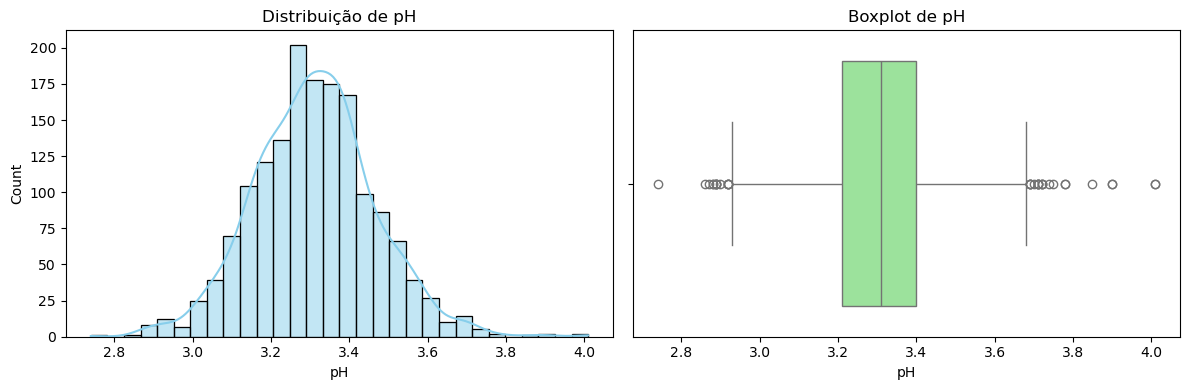

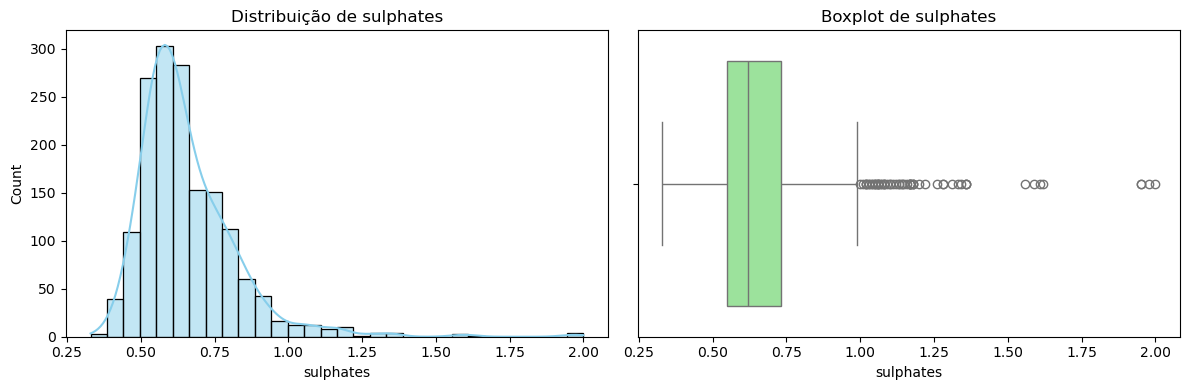

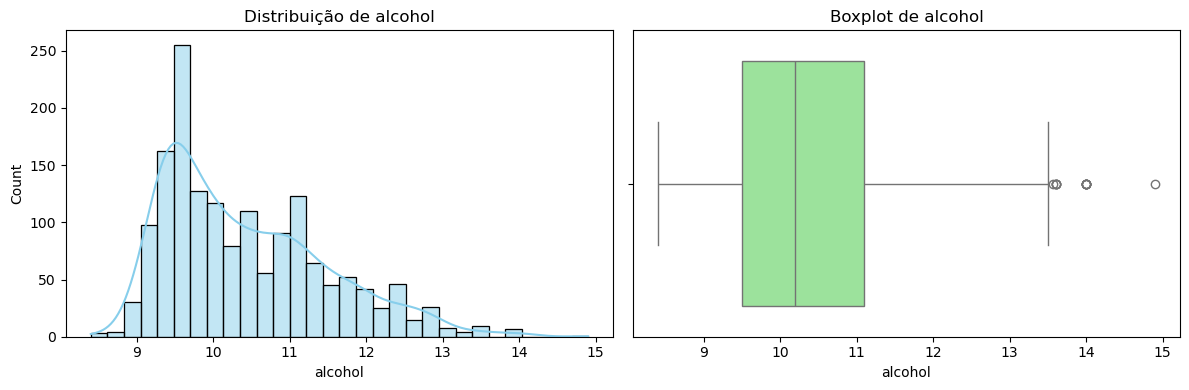

In [25]:
# Selecionar apenas colunas numéricas
numeric_cols = [col for col in wine.select_dtypes(include='number').columns if col not in ['quality', 'goodquality']]

# Gerar histogramas com KDE e boxplots
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    # Histograma com densidade
    plt.subplot(1, 2, 1)
    sns.histplot(wine[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=wine[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


## Boxplots: relationship between features and wine quality

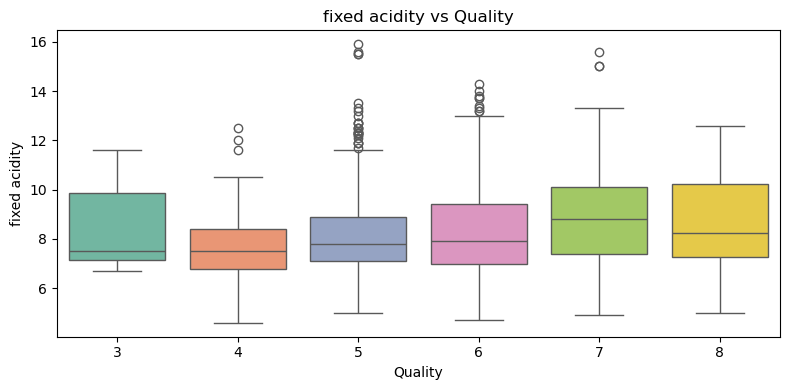

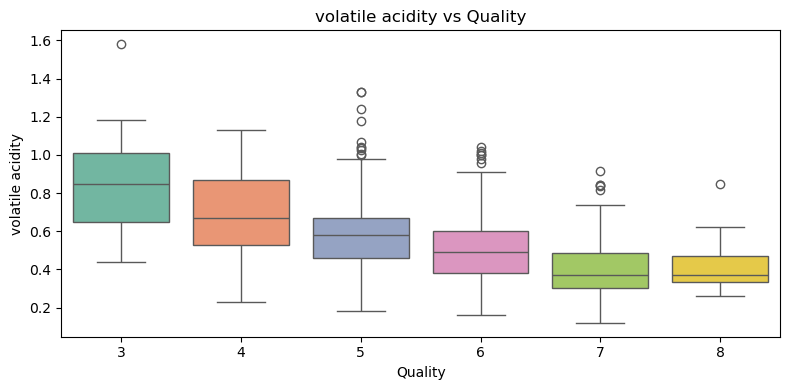

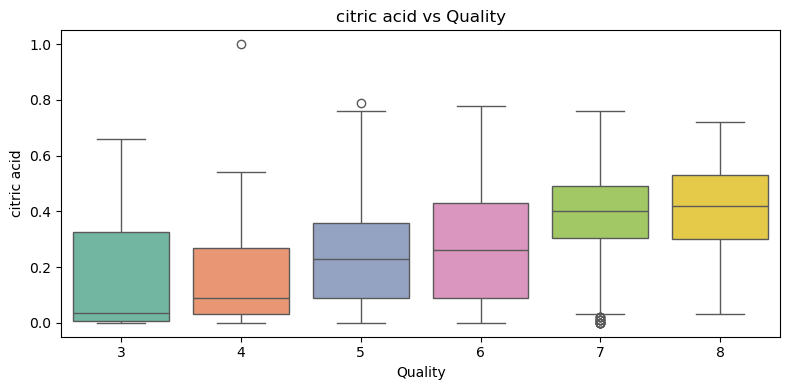

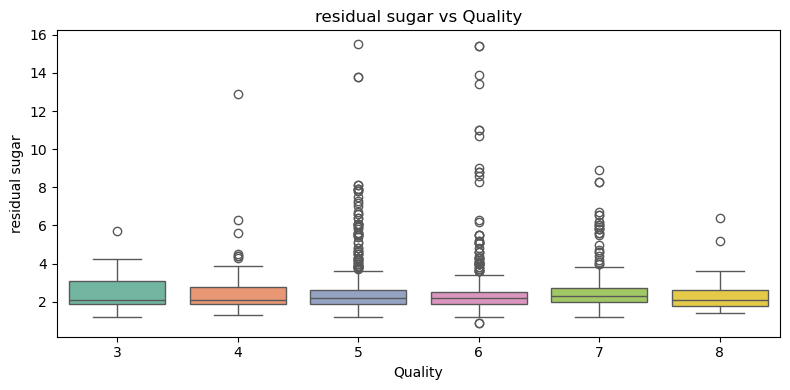

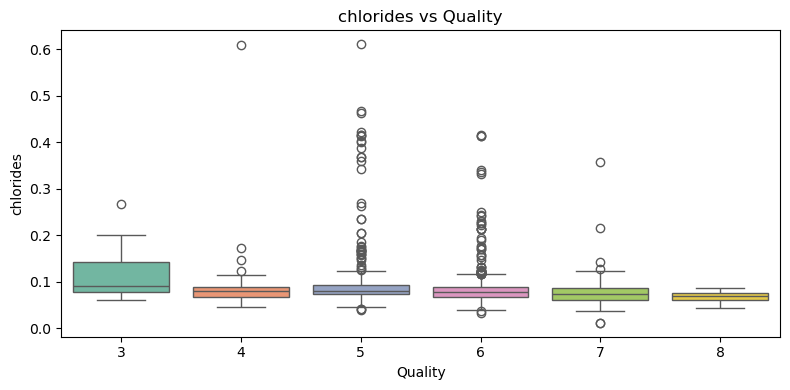

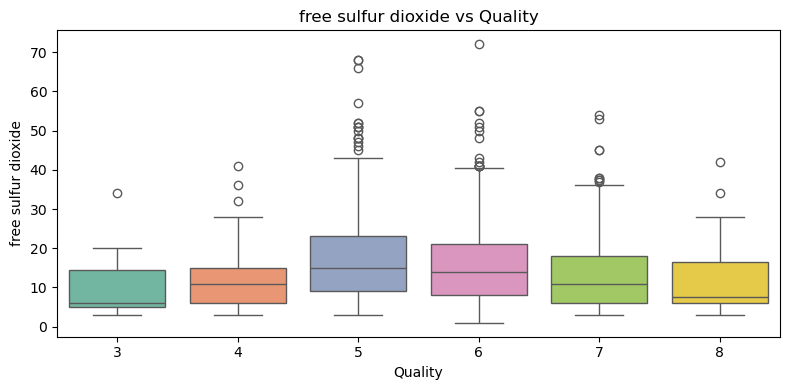

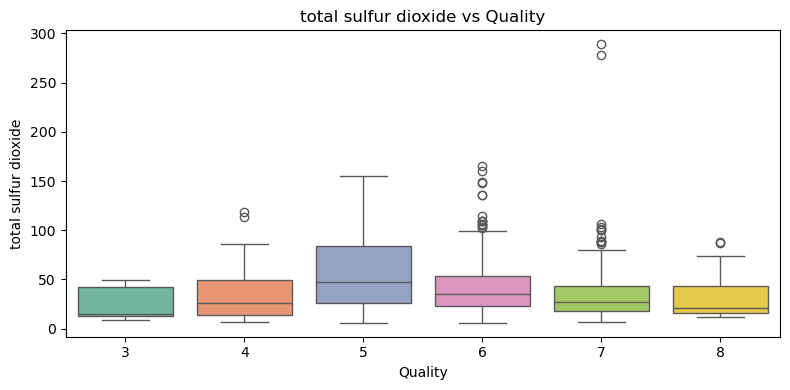

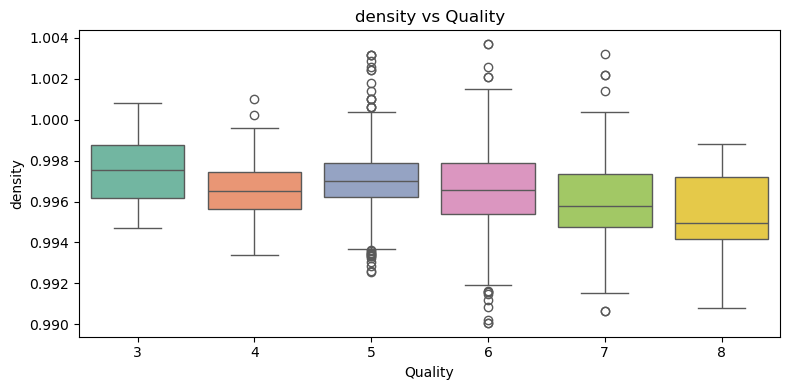

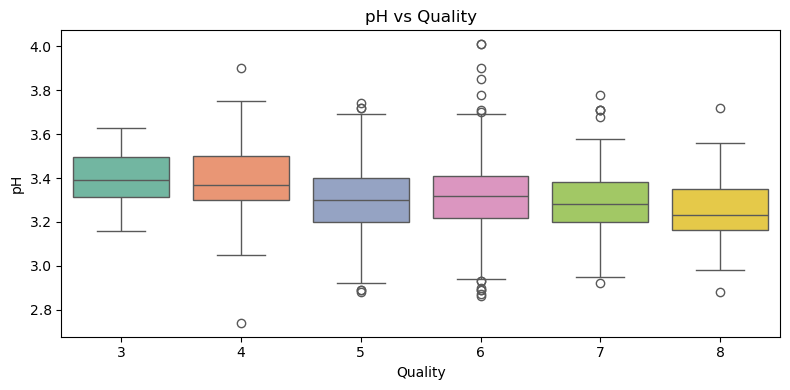

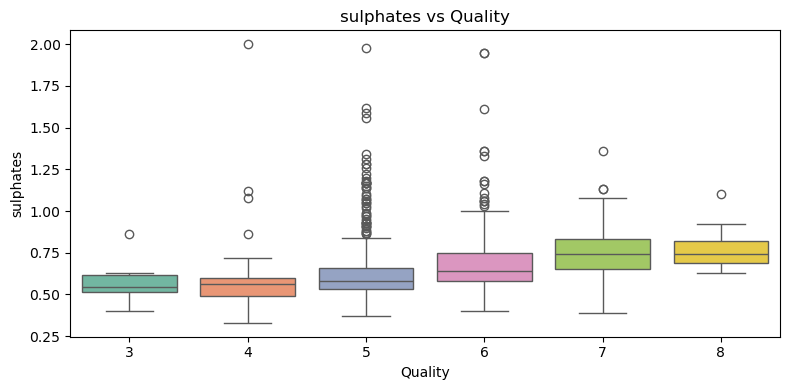

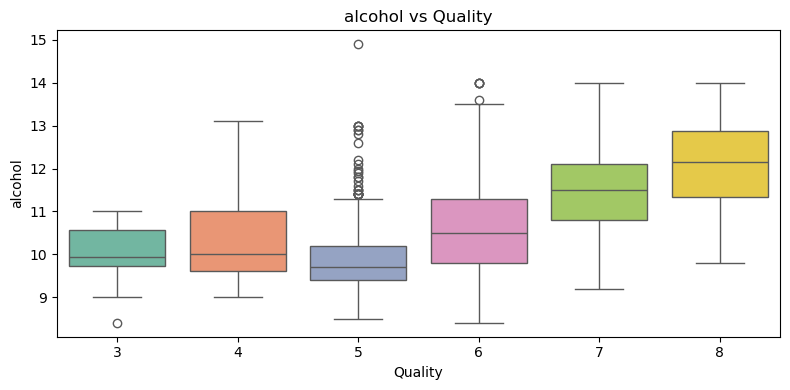

In [26]:
# Boxplots comparando quality com todas as variáveis numéricas

# Gerar boxplots comparando cada variável com quality
for col in numeric_cols: #gerada na celula anterior
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='quality', y=col, data=wine, palette='Set2')
    plt.title(f'{col} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Boxplots by goodquality
ideal para ver como cada atributo numérico se comporta em vinhos classificados como bons (1) ou não (0).


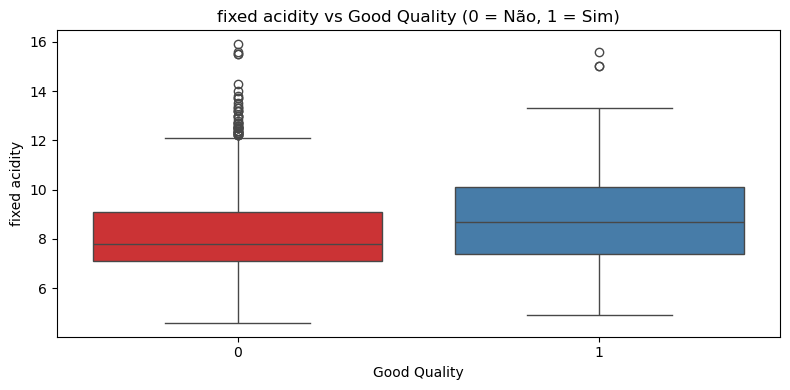

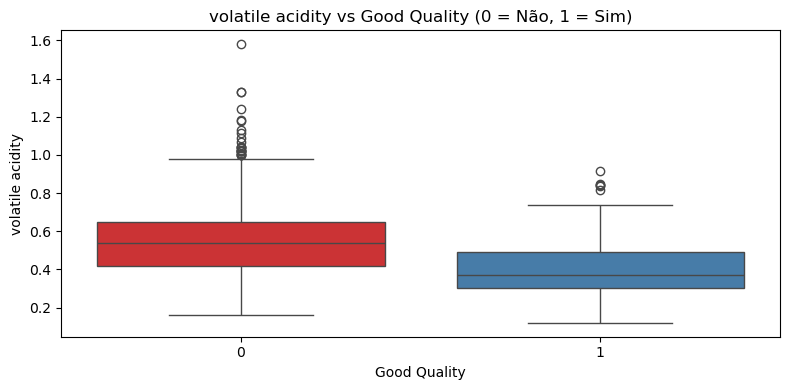

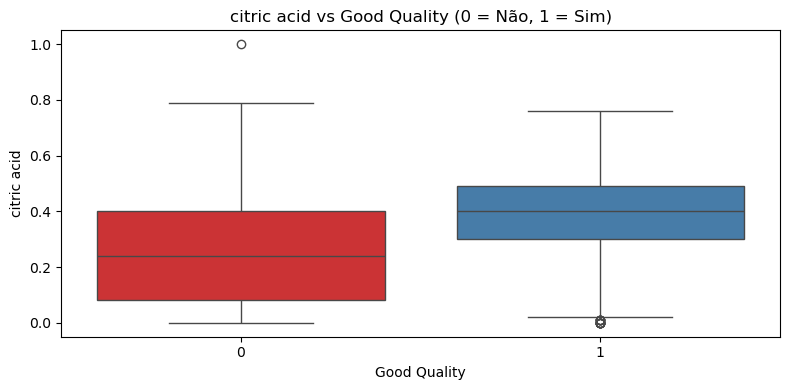

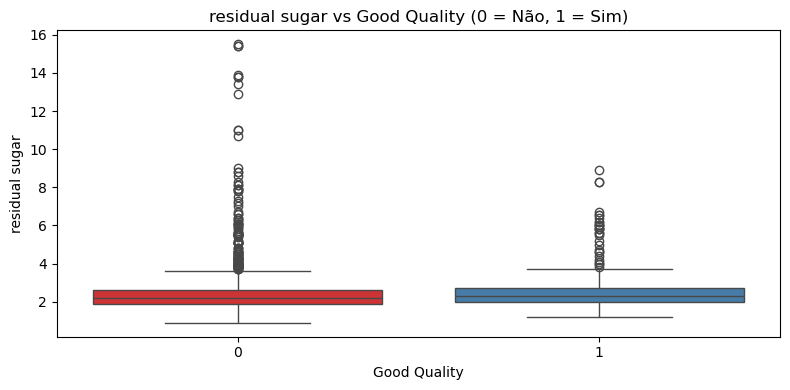

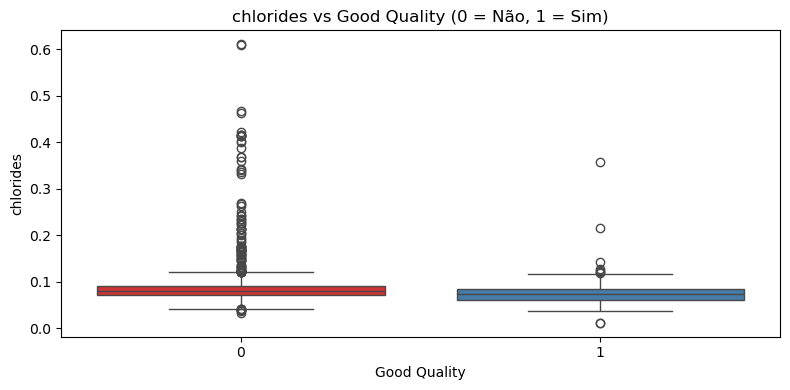

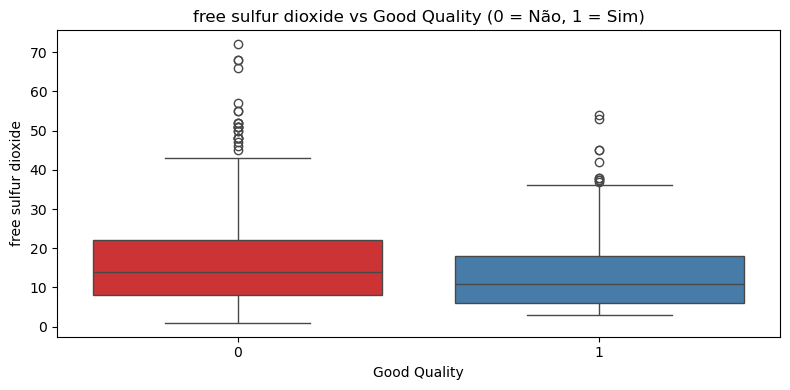

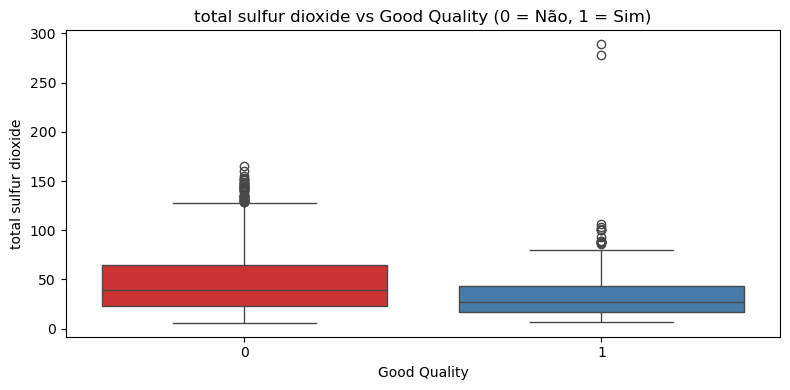

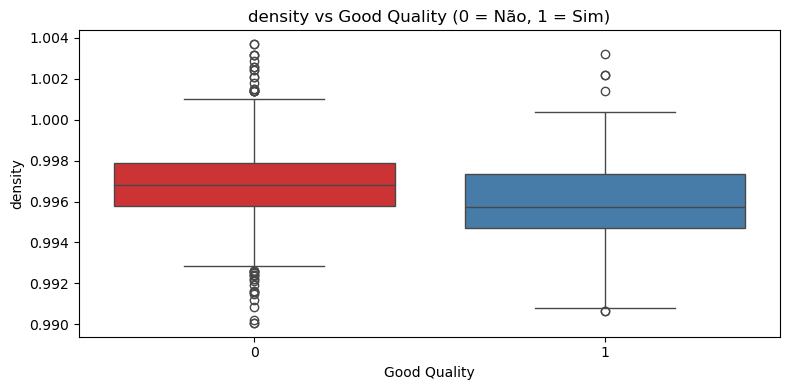

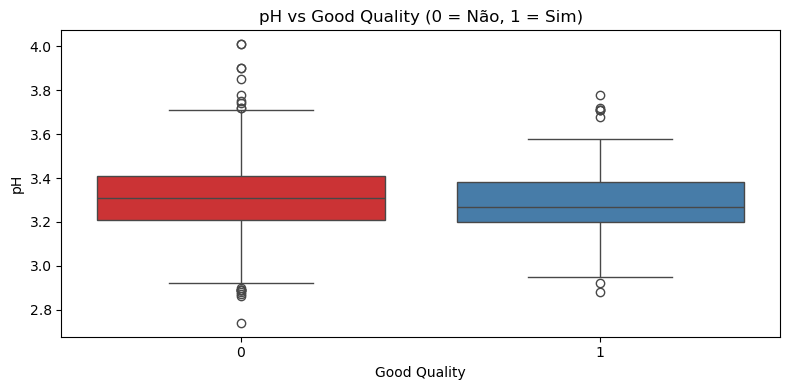

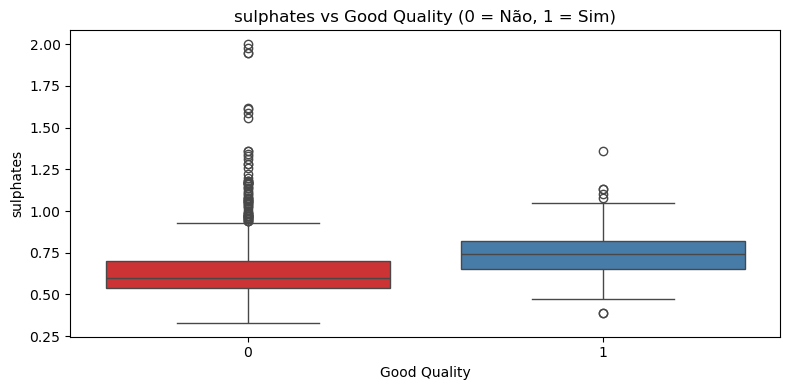

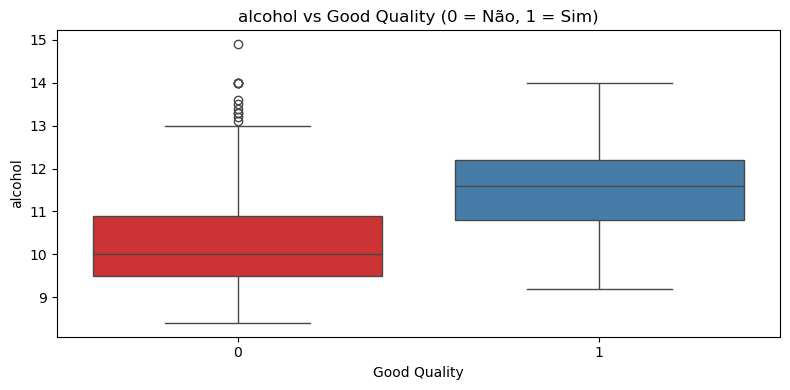

In [27]:
# Criar boxplots agrupando por good_quality
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='goodquality', y=col, data=wine, palette='Set1')
    plt.title(f'{col} vs Good Quality (0 = Não, 1 = Sim)')
    plt.xlabel('Good Quality')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Statistical tests 

testes estatísticos de significância, para saber se as diferenças entre vinhos bons e ruins (good_quality = 1 vs 0) são estatisticamente relevantes.

- Teste t de Student (para amostras independentes):

- Usaremos o t-test do scipy.stats para comparar a média de cada variável contínua entre os grupos de goodquality.

- Aplicaremos a Correção de Bonferroni para aumentar a confiabilidade reduzindo falsos positivos

Como interpretar:

- p-Value < 0.05 → diferença estatisticamente significativa entre vinhos bons e ruins para essa variável.
- A coluna "Significant (p < 0.05)" já indica isso diretamente.

In [28]:
from scipy.stats import ttest_ind

wine_good = wine[wine['goodquality'] == 1]
wine_bad = wine[wine['goodquality'] == 0]

# Correção Bonferroni
alpha = 0.05
bonferroni_threshold = alpha / len(numeric_cols)

# Armazenar resultados
t_test_results = []

for col in numeric_cols:
    stat, p_value = ttest_ind(wine_good[col], wine_bad[col], equal_var=False)
    t_test_results.append({
        'Feature': col,
        't-Statistic': stat,
        'p-Value': p_value,
        'Significant (p < 0.05)': p_value < 0.05,
        'Significant w/ Bonferroni': p_value < bonferroni_threshold
    })

df_ttest = pd.DataFrame(t_test_results).sort_values('p-Value')
display(df_ttest)


,Feature,t-Statistic,p-Value,Significant (p < 0.05),Significant w/ Bonferroni
10,alcohol,17.450495,7.793167e-47,True,True
1,volatile acidity,-12.952139,3.165494e-31,True,True
9,sulphates,9.685047,9.945136e-20,True,True
2,citric acid,8.627717,4.497947e-16,True,True
4,chlorides,-5.708960,2.067627e-08,True,True
6,total sulfur dioxide,-5.632180,4.228165e-08,True,True
7,density,-5.274615,2.775161e-07,True,True
0,fixed acidity,4.263548,2.796749e-05,True,True
5,free sulfur dioxide,-2.922183,3.747866e-03,True,True
8,pH,-2.289237,2.278993e-02,True,False


## Additional views

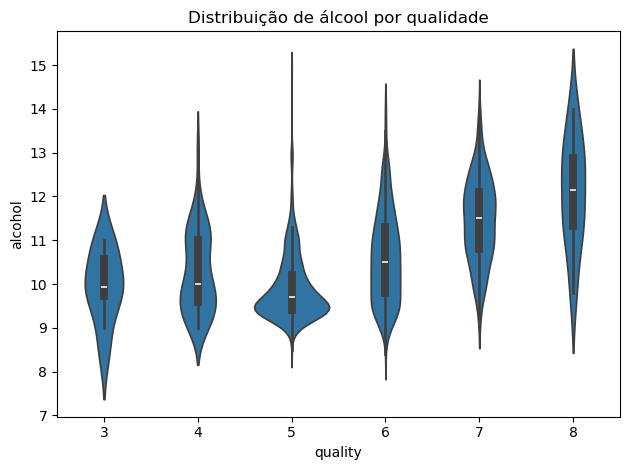

In [30]:
#violinplot
sns.violinplot(x='quality', y='alcohol', data=wine)
plt.title('Distribuição de álcool por qualidade')
plt.tight_layout()
plt.show()

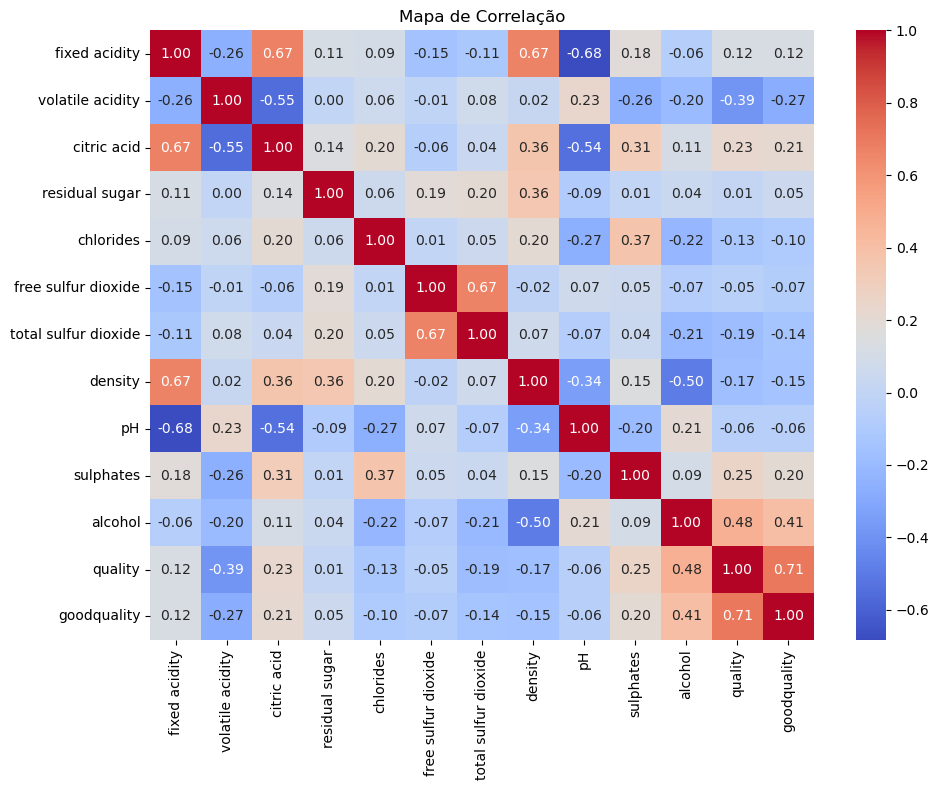

In [ ]:
# Heatmap for expressing correlation
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação')
plt.tight_layout()
plt.show()

## Machine Learning Preparation

In [35]:
X = wine.drop(['quality', 'goodquality'], axis=1)
Y = wine['goodquality']

## Classification Models

In [37]:
#imports
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=31)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [38]:
model1 = LogisticRegression().fit(X_train, Y_train)
model2 = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
model3 = SVC().fit(X_train, Y_train)
model4 = DecisionTreeClassifier(criterion='entropy', random_state=7).fit(X_train, Y_train)
model5 = GaussianNB().fit(X_train, Y_train)
model6 = RandomForestClassifier(random_state=1).fit(X_train, Y_train)
model7 = xgb.XGBClassifier(random_state=1).fit(X_train, Y_train)

## Model evaluation

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
model_preds = [
    ("Logistic Regression", model1, model1.predict(X_test)),
    ("KNN", model2, model2.predict(X_test)),
    ("SVC", model3, model3.predict(X_test)),
    ("Decision Tree", model4, model4.predict(X_test)),
    ("Naive Bayes", model5, model5.predict(X_test)),
    ("Random Forest", model6, model6.predict(X_test)),
    ("XGBoost", model7, model7.predict(X_test))
]

In [40]:
def evaluate_model_metrics(Y_test, model_name, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(Y_test, y_pred),
        "F1 Score": f1_score(Y_test, y_pred, average='weighted'),
        "Precision": precision_score(Y_test, y_pred, average='weighted'),
        "Recall": recall_score(Y_test, y_pred, average='weighted'),
    }

results = [evaluate_model_metrics(Y_test, name, y_pred) for name, _, y_pred in model_preds]
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(df_results)

,Model,Accuracy,F1 Score,Precision,Recall
5,Random Forest,0.918750,0.915017,0.913247,0.918750
6,XGBoost,0.908333,0.906157,0.904496,0.908333
0,Logistic Regression,0.881250,0.873469,0.868563,0.881250
3,Decision Tree,0.881250,0.886974,0.895049,0.881250
2,SVC,0.881250,0.827644,0.895381,0.881250
1,KNN,0.860417,0.859892,0.859378,0.860417
4,Naive Bayes,0.839583,0.858459,0.895857,0.839583


### Comparison chart

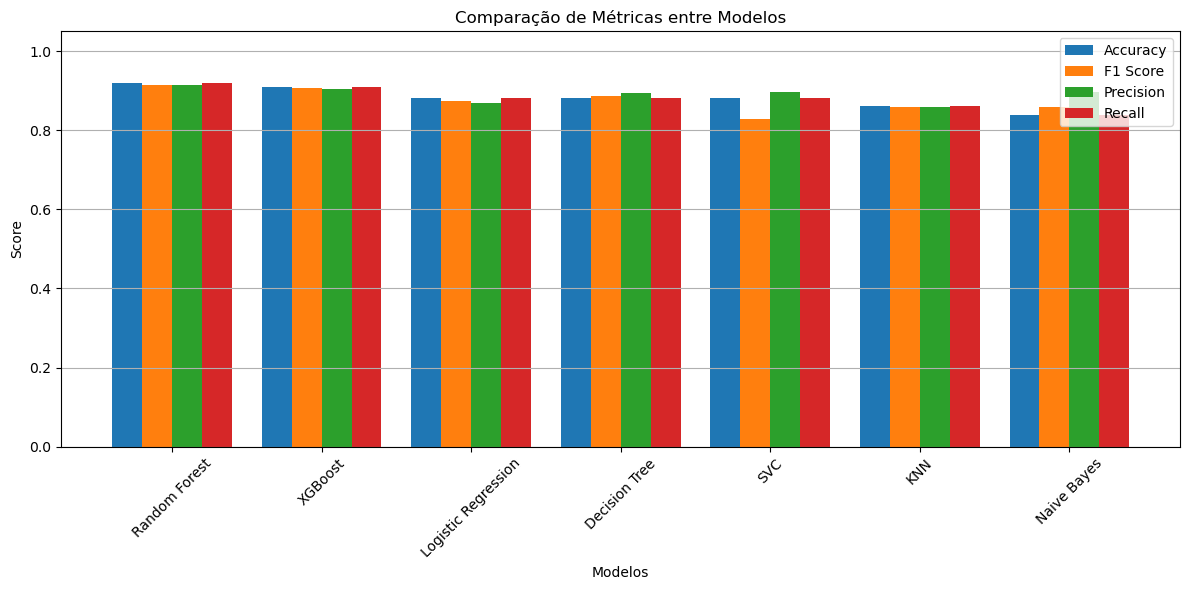

In [41]:
# Gráfico comparativo
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(df_results))
width = 0.2
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, df_results[metric], width, label=metric)
plt.xlabel('Modelos')
plt.ylabel('Score')
plt.title('Comparação de Métricas entre Modelos')
plt.xticks(x + width * 1.5, df_results['Model'], rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Classification Report and confusion matrix by model


Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       422
           1       0.51      0.38      0.44        58

    accuracy                           0.88       480
   macro avg       0.71      0.66      0.68       480
weighted avg       0.87      0.88      0.87       480



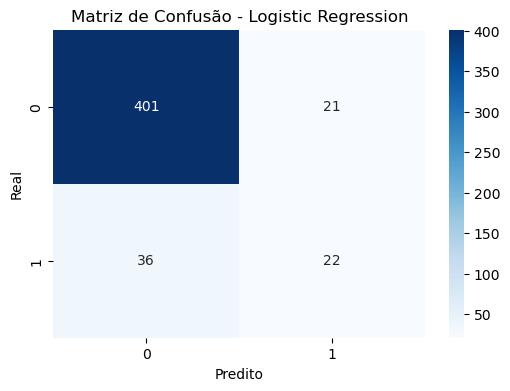


KNN
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       422
           1       0.42      0.41      0.42        58

    accuracy                           0.86       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.86      0.86      0.86       480



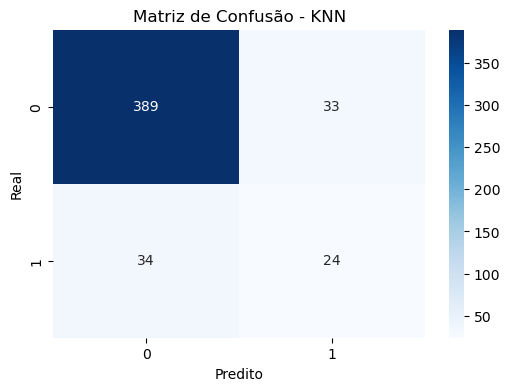


SVC
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       422
           1       1.00      0.02      0.03        58

    accuracy                           0.88       480
   macro avg       0.94      0.51      0.49       480
weighted avg       0.90      0.88      0.83       480



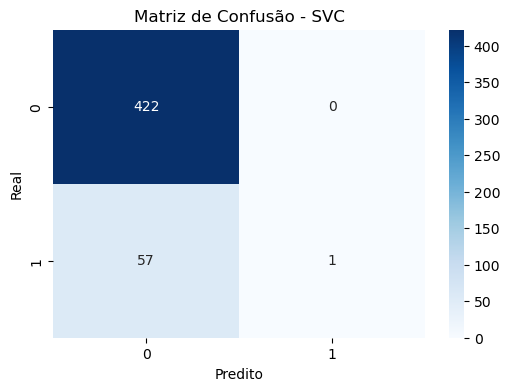


Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       422
           1       0.51      0.64      0.56        58

    accuracy                           0.88       480
   macro avg       0.73      0.78      0.75       480
weighted avg       0.90      0.88      0.89       480



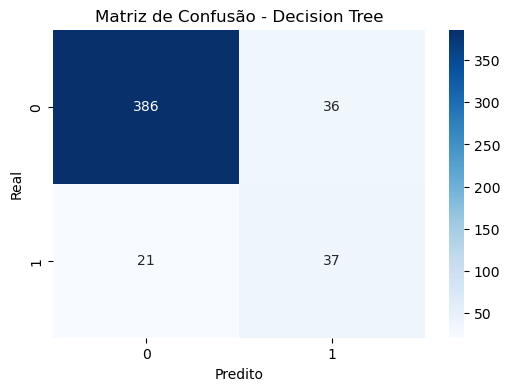


Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       422
           1       0.41      0.76      0.53        58

    accuracy                           0.84       480
   macro avg       0.69      0.80      0.72       480
weighted avg       0.90      0.84      0.86       480



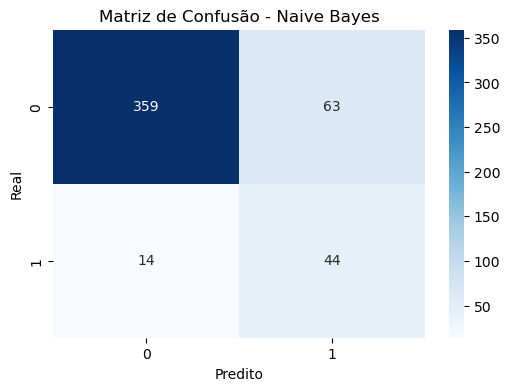


Random Forest
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       422
           1       0.70      0.57      0.63        58

    accuracy                           0.92       480
   macro avg       0.82      0.77      0.79       480
weighted avg       0.91      0.92      0.92       480



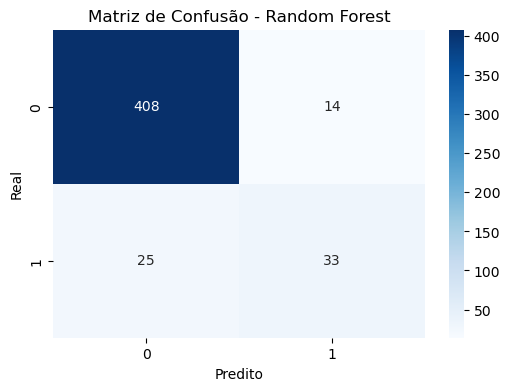


XGBoost
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       422
           1       0.63      0.57      0.60        58

    accuracy                           0.91       480
   macro avg       0.79      0.76      0.77       480
weighted avg       0.90      0.91      0.91       480



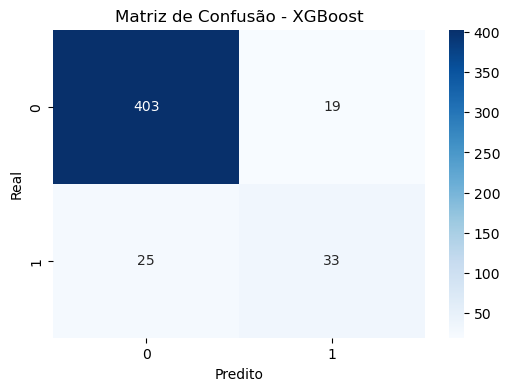

In [42]:
# Relatório e matriz de confusão por modelo
def evaluate_visual(model_name, Y_test, y_pred):
    print(f"\n{model_name}")
    print(classification_report(Y_test, y_pred))
    conf_matrix = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

for name, _, y_pred in model_preds:
    evaluate_visual(name, Y_test, y_pred)